In [1]:
!pip install seaborn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns
from myplotting import PlotLearning

2021-11-29 21:22:23.047753: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
# Step 1. Load train and test data set.
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Scale the data b/w 0 and 1 by dividing it by 255 as its unsigned int
X_train_full = X_train_full/255.
X_test = X_test/255.

# Create the validation data from training data.
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# lets create the model
# Flatten = make the array to sequential layer
# Dense = creating a hidden OR output layer
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28], name="inputLayer"),
         tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
         tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
         tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")
         ]
model = tf.keras.models.Sequential(LAYERS)

hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model.compile(
    loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS
)

2021-11-29 21:22:25.132239: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-11-29 21:22:25.132441: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2021-11-29 21:22:25.132456: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-29 21:22:25.132476: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyterhub-nb-mmurakam): /proc/driver/nvidia/version does not exist
2021-11-29 21:22:25.132676: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  A

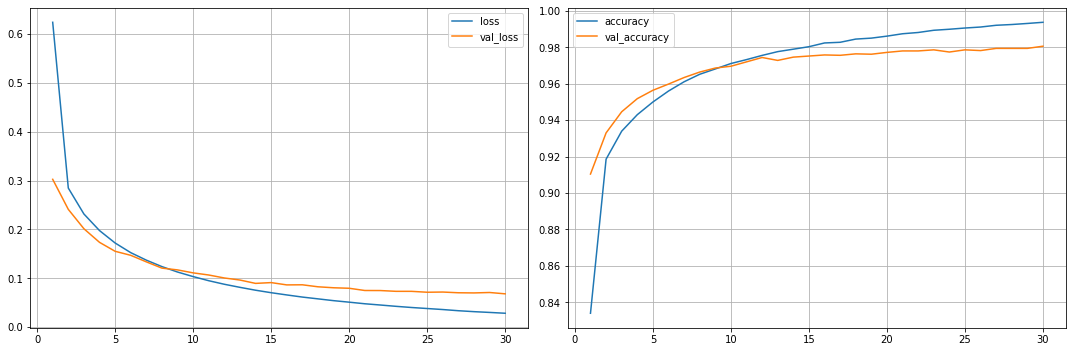

In [3]:
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)
history = model.fit(X_train, y_train, epochs=EPOCHS,
                   validation_data=VALIDATION_SET,
                   callbacks=[PlotLearning()])